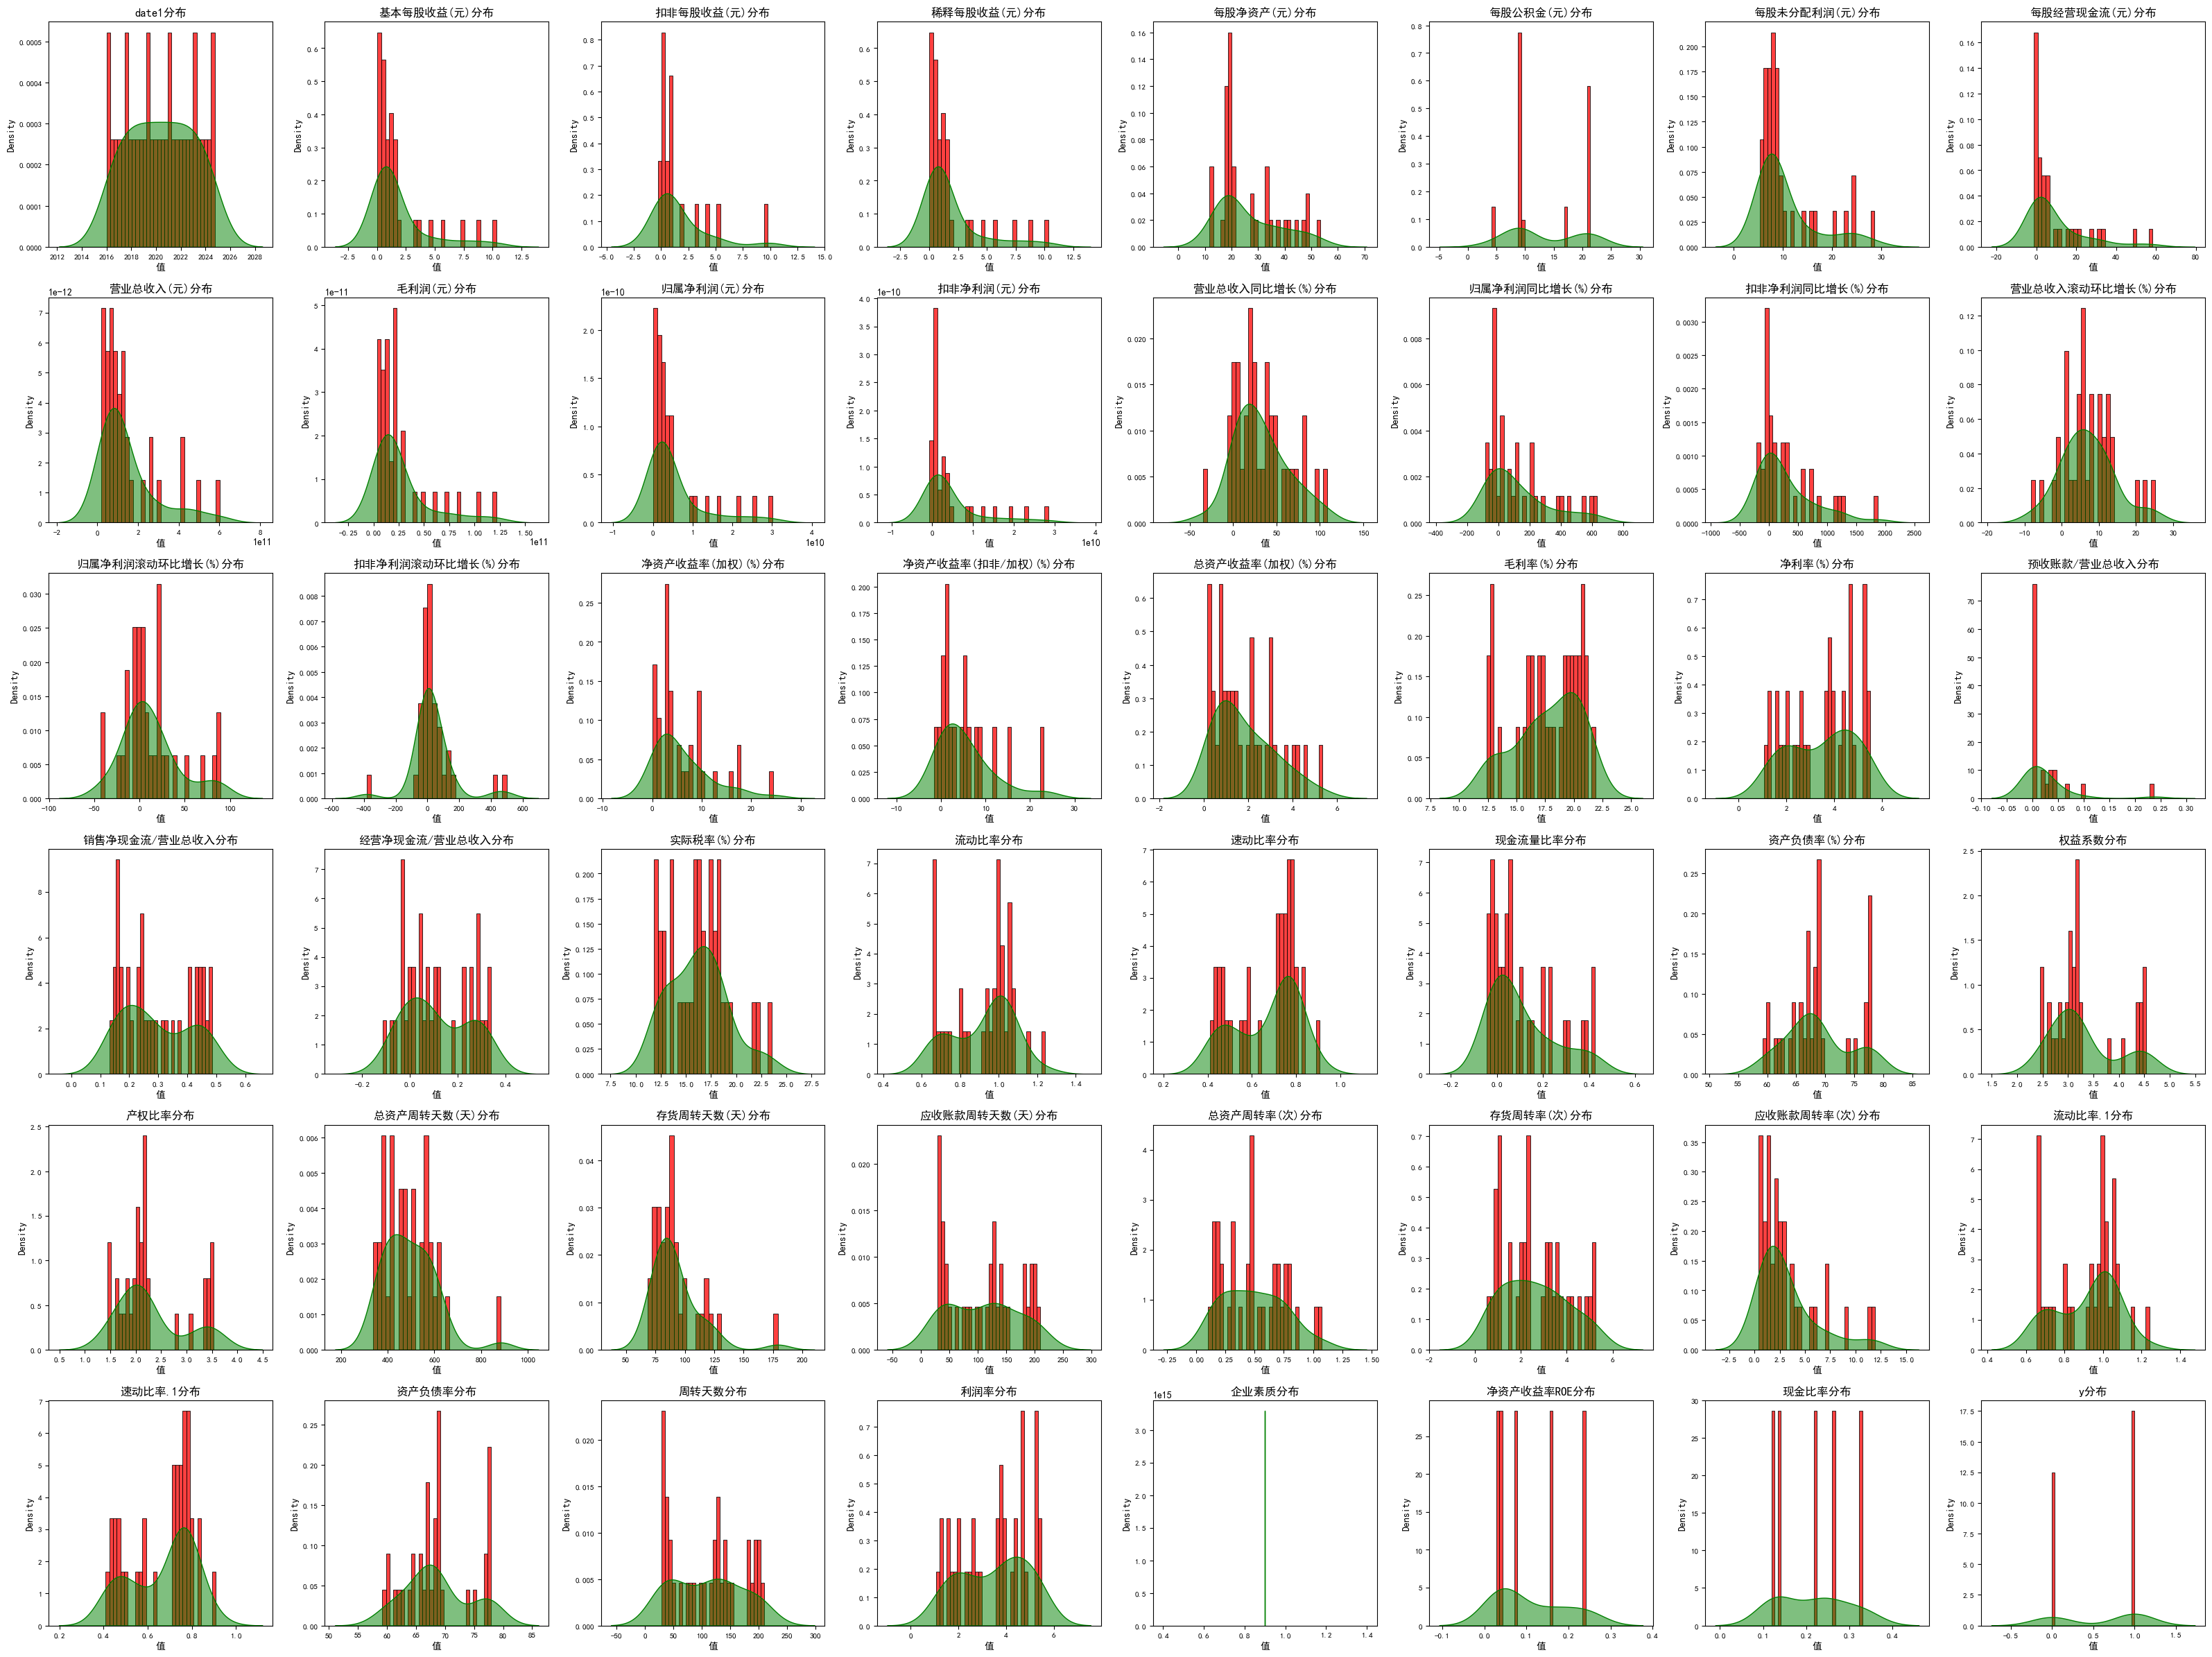

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 解决中文显示问题
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

df = pd.read_excel('E:\0 团队 知识工程\变量指标5.xlsx')  
# 假设数据读取部分正确，此处省略（保持原有读取逻辑）

# 描述性统计：直方图 + 密度图（改为八个一排）
n_cols = df.shape[1]
n_rows = (n_cols + 7) // 8  # 每行8个，向上取整
fig, axes = plt.subplots(n_rows, 8, figsize=(32, n_rows * 4))  # 调整画布尺寸为宽32，高4*行数

for i, col in enumerate(df.columns):
    row = i // 8
    ax = axes[row, i % 8]  # 每行8个子图
    
    # 绘制直方图和密度图
    sns.histplot(df[col], ax=ax, kde=False, color='red', stat="density", bins=30)
    sns.kdeplot(df[col], ax=ax, color='green', fill=True, alpha=0.5)
    
    ax.set_xlabel('值')
    ax.set_title(f'{col}分布')
    ax.tick_params(axis='both', which='major', labelsize=8)  # 减小刻度字体大小

# 隐藏多余子图（若列数非8的倍数）
for i in range(n_cols, n_rows * 8):
    row = i // 8
    ax = axes[row, i % 8]
    ax.set_visible(False)

plt.tight_layout()
plt.savefig('描述性统计图表.png', dpi=300)
plt.show()

# 皮尔逊相关分析：热力图（若需调整可保留原逻辑，此处略）

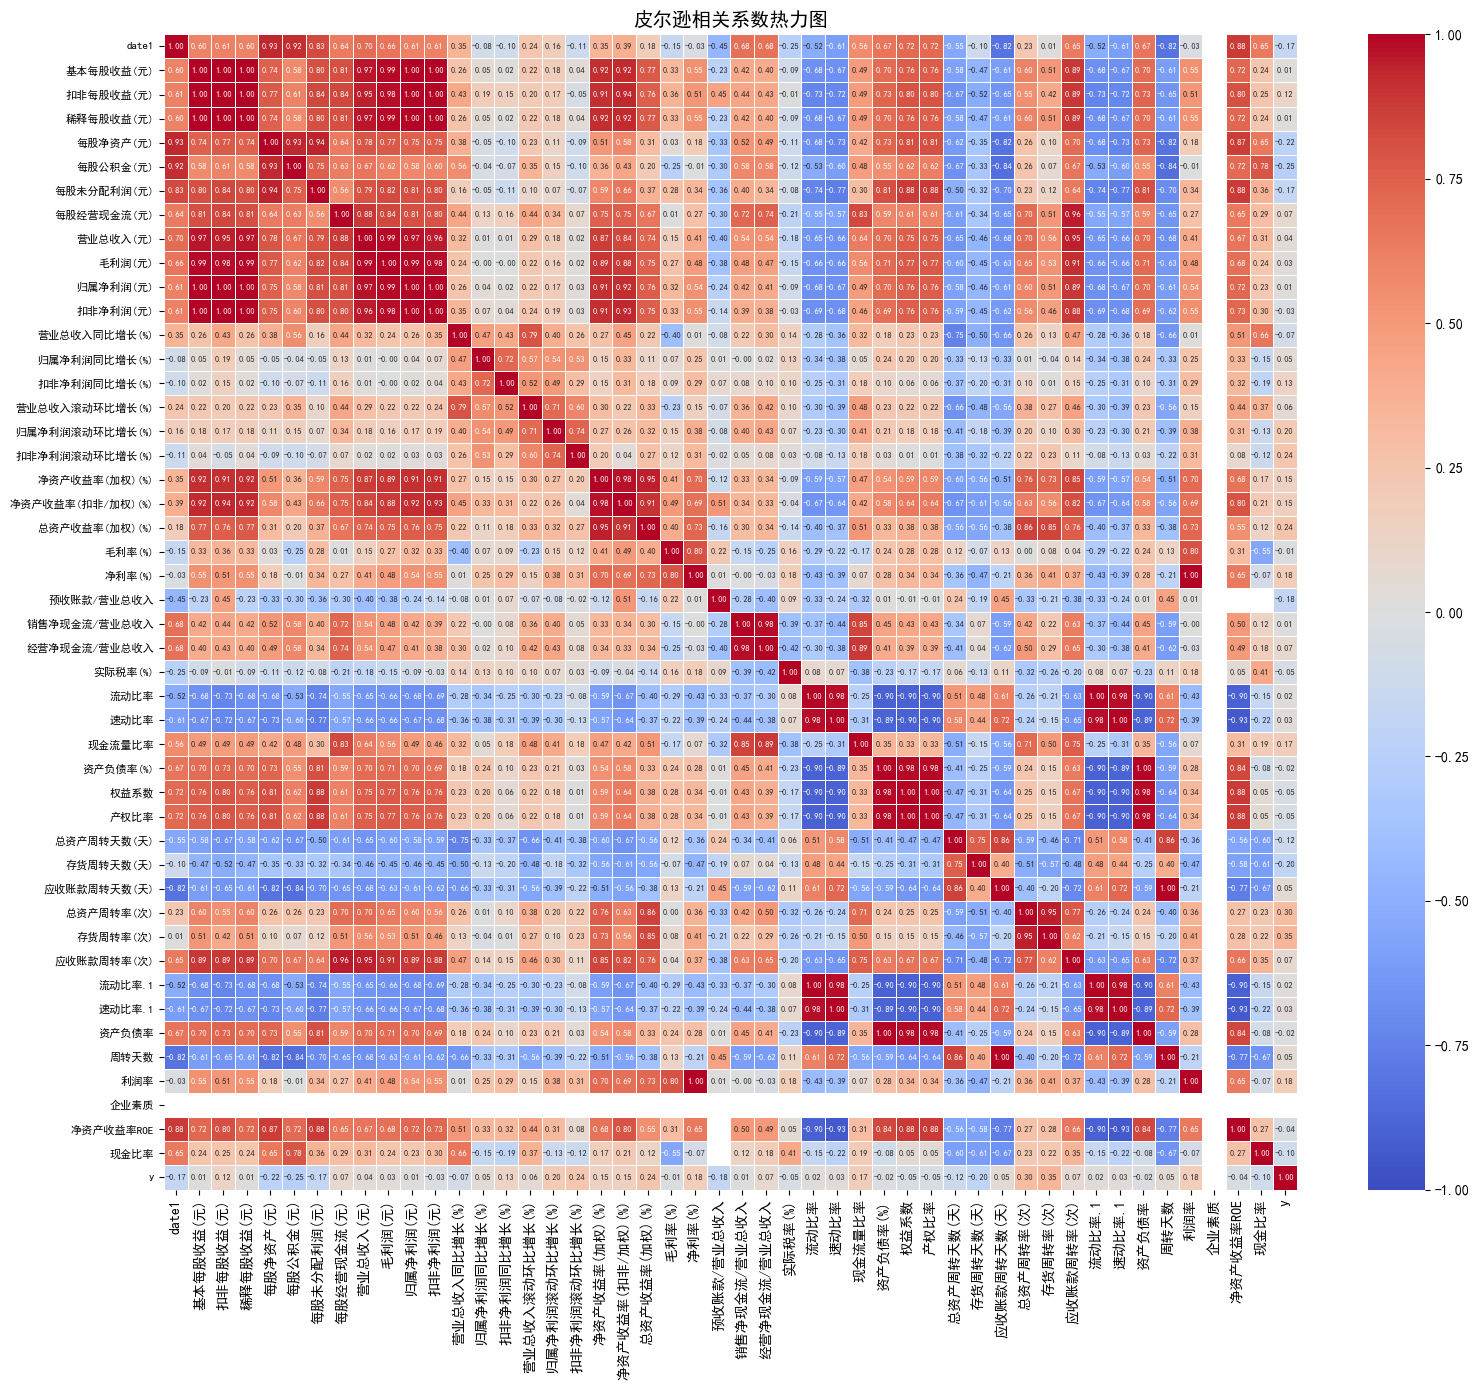

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 解决中文显示问题
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False


# 皮尔逊相关分析：热力图（调整间距）
corr_matrix = df.corr(method='pearson')

plt.figure(figsize=(16, 14))  # 增大画布尺寸
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='coolwarm',
    vmin=-1, vmax=1,
    linewidths=0.5,
    fmt='.2f',
    annot_kws={'fontsize': 6},  # 适当缩小数字字体
)
plt.title('皮尔逊相关系数热力图', fontsize=14)
plt.xticks(rotation=90)  # 竖排显示x轴标签
plt.yticks(fontsize=8)
plt.tight_layout()  # 自动调整布局
plt.savefig('皮尔逊相关热力图.png', dpi=300)
plt.show()